# GEREKLI KURULUMLAR YAPILDI

In [47]:
 
import pandas as pd
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics

def printmd(string):
    display(Markdown(string))
    
    

#from sklearn.model_selection import cross_val_score
#from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# DATASET INDIRILDI VE LISTELENDI

In [48]:
adult = pd.read_csv('adult.csv')
adult

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [49]:
# Egitim ve test datalarinin olusturulmasi
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
train = pd.read_csv('adult_data.txt', sep=",\s", header=None, names = column_names, engine = 'python')
test = pd.read_csv('adult_test.txt', sep=",\s", header=None, names = column_names, engine = 'python')
test['income'].replace(regex=True,inplace=True,to_replace=r'\.',value=r'')


adult = pd.concat([test,train]) #pandas kutuphanesindeki 'concat' metodunu kullanarak veri birlestirme yapiyoruz
adult.reset_index(inplace = True, drop = True) #Index sıfırlama (ve adult'a uygulama)

# 1. Ön Veri Analizi

In [50]:
#Tüm kategorik sütunları kategori yazacak şekilde ayarlama
for col in set(adult.columns) - set(adult.describe().columns):
    adult[col] = adult[col].astype('category')
    
printmd('## 1.1. Sutunlar ve tipleri')
print(adult.info())

## 1.1. Sutunlar ve tipleri

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              48842 non-null  int64   
 1   workclass        48842 non-null  category
 2   fnlwgt           48842 non-null  int64   
 3   education        48842 non-null  category
 4   educational-num  48842 non-null  int64   
 5   marital-status   48842 non-null  category
 6   occupation       48842 non-null  category
 7   relationship     48842 non-null  category
 8   race             48842 non-null  category
 9   gender           48842 non-null  category
 10  capital-gain     48842 non-null  int64   
 11  capital-loss     48842 non-null  int64   
 12  hours-per-week   48842 non-null  int64   
 13  native-country   48842 non-null  category
 14  income           48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB
None


In [18]:
# Ilk 5 kayit
printmd('## 1.2. Data')
adult.head()

## 1.2. Data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [19]:
printmd('## 1.3. Istatiklerin Ozeti')

adult.describe() #describe() metodu sayısal verilere sahip olan sütunların max, min , std… gibi istatiksel değerlerini döndürür.

## 1.3. Istatiklerin Ozeti

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
printmd('## 1.4. Kayip Degerler')
for i,j in zip(adult.columns,(adult.values.astype(str) == '?').sum(axis = 0)):
    if j > 0:
        printmd(str(i) + ': ' + str(j) + ' kayit')

## 1.4. Kayip Degerler

workclass: 2799 kayit

occupation: 2809 kayit

native-country: 857 kayit

## Kayip Degerlerin Tahmin Edilerek Doldurulmasi
Üç sütunun her birindeki eksik değerleri değerlerini tahmin ederek dolduruyoruz. 
Üç sütunun her biri için, tüm öznitelikleri ('income (gelir)' dahil) bağımsız değişkenler olarak kullanıyorum ve bu sütunu bağımlı değişken olarak ele alarak çok sınıflı sınıflandırma görevi yapıyorum. Değer eksik olduğunda sınıfı tahmin etmek için lojistik regresyon, karar ağaçları ve rastgele orman olmak üzere üç sınıflandırma algoritması kullanıyorum (bu durumda a '?'). Daha sonra eksik değerin sınıfı olmak için üç sınıflandırıcı arasındaki çoğunluk oyunu alıyorum. Bir eşitlik durumunda, tüm veri kümesini kullanarak bu sütunun çoğunluk sınıfını (majority class) seçiyorum.

In [21]:
# Veri cercevesindeki kategorik sutunlarin 'one hot encode' haline donusturulmesi
def oneHotCatVars(df, df_cols):
    
    df_1 = adult_data = df.drop(columns = df_cols, axis = 1)
    df_2 = pd.get_dummies(df[df_cols])
    
    return (pd.concat([df_1, df_2], axis=1, join='inner'))

## 1.4.1 One Hot Encoding Nedir?
One Hot Encoding, kategorik değişkenlerin ikili (binary) olarak temsil edilmesi anlamına gelmektedir. Bu işlem ilk önce kategorik değerlerin tamsayı değerleriyle eşlenmesini gerektirir. Daha sonra, her bir tamsayı değeri, 1 ile işaretlenmiş tamsayı indeksi dışında ki tüm değerleri   sıfır  olan bir ikili vektör olarak temsil edilir. Örneğin aşağıda 3 kategoride veri vardır apple,chicken ve broccoli bu alanlar binary olarak ayrıştırıldığında Apple için ilk satır 1 iken diğerleri 0 oluyor Diğer veri içinde aynı şekilde sayısal veriye çevirme işlemi devem ediyor.
Bir One Hot Encoding, kategorik verilerin temsilinin daha etkileyici ve kolay olmasını sağlar.

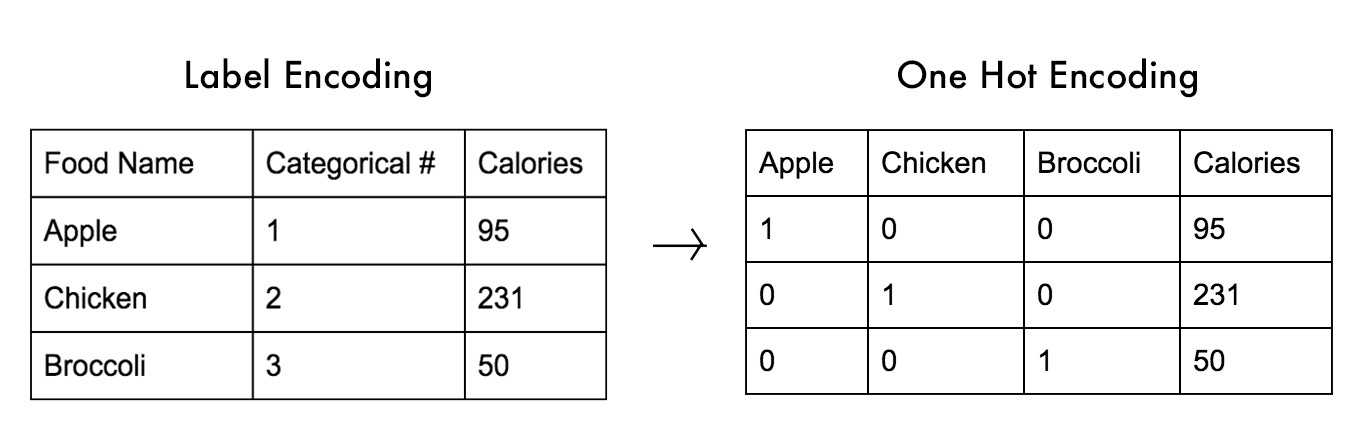

In [22]:
from IPython.display import Image
Image(filename='onehotencoding.jpg')

In [23]:
printmd('### 1.4.2. Workclass ozniteligi icin kayip degerlerin doldurulmasi')

test_data = adult[(adult.workclass.values == '?')].copy()
test_label = test_data.workclass

train_data = adult[(adult.workclass.values != '?')].copy()
train_label = train_data.workclass

test_data.drop(columns = ['workclass'], inplace = True)
train_data.drop(columns = ['workclass'], inplace = True)

train_data = oneHotCatVars(train_data, train_data.select_dtypes('category').columns)
test_data = oneHotCatVars(test_data, test_data.select_dtypes('category').columns)

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)

majority_class = adult.workclass.value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': r_forest_pred, 'DTree' : clf_pred, 'LogReg' : log_reg_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

adult.loc[(adult.workclass.values == '?'),'workclass'] = overall_pred.values
print(adult.workclass.value_counts())
print(adult.workclass.unique())

### 1.4.2. Workclass ozniteligi icin kayip degerlerin doldurulmasi

C:\Users\Ecem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Private             35733
Self-emp-not-inc     3870
Local-gov            3137
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Never-worked          973
Without-pay            21
?                       0
Name: workclass, dtype: int64
['Private', 'Local-gov', 'Never-worked', 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay']
Categories (9, object): ['?', 'Federal-gov', 'Local-gov', 'Never-worked', ..., 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']


In [24]:
printmd('### 1.4.3. Occupation ozniteligi icin kayip degerlerin doldurlmasi')

test_data = adult[(adult.occupation.values == '?')].copy()
test_label = test_data.occupation

train_data = adult[(adult.occupation.values != '?')].copy()
train_label = train_data.occupation

test_data.drop(columns = ['occupation'], inplace = True)
train_data.drop(columns = ['occupation'], inplace = True)

train_data = oneHotCatVars(train_data, train_data.select_dtypes('category').columns)
test_data = oneHotCatVars(test_data, test_data.select_dtypes('category').columns)

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)


majority_class = adult.occupation.value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': r_forest_pred, 'DTree' : clf_pred, 'LogReg' : log_reg_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

adult.loc[(adult.occupation.values == '?'),'occupation'] = overall_pred.values
print(adult.occupation.value_counts())
print(adult.occupation.unique())

### 1.4.3. Occupation ozniteligi icin kayip degerlerin doldurlmasi

C:\Users\Ecem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Prof-specialty       7741
Craft-repair         6647
Exec-managerial      6142
Adm-clerical         5848
Sales                5568
Other-service        5129
Machine-op-inspct    3064
Transport-moving     2388
Handlers-cleaners    2098
Farming-fishing      1514
Tech-support         1453
Protective-serv       986
Priv-house-serv       249
Armed-Forces           15
?                       0
Name: occupation, dtype: int64
['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', 'Adm-clerical', 'Other-service', ..., 'Sales', 'Priv-house-serv', 'Transport-moving', 'Handlers-cleaners', 'Armed-Forces']
Length: 14
Categories (15, object): ['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', ..., 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']


In [25]:
printmd('### 1.4.4. Native Country ozniteligi icin kayip degerlerin doldurulmasi')

test_data = adult[(adult['native-country'].values == '?')].copy()
test_label = test_data['native-country']

train_data = adult[(adult['native-country'].values != '?')].copy()
train_label = train_data['native-country']

test_data.drop(columns = ['native-country'], inplace = True)
train_data.drop(columns = ['native-country'], inplace = True)

train_data = oneHotCatVars(train_data, train_data.select_dtypes('category').columns)
test_data = oneHotCatVars(test_data, test_data.select_dtypes('category').columns)

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)


majority_class = adult['native-country'].value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': r_forest_pred, 'DTree' : clf_pred, 'LogReg' : log_reg_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

adult.loc[(adult['native-country'].values == '?'),'native-country'] = overall_pred.values
print(adult['native-country'].value_counts())
print(adult['native-country'].unique())

### 1.4.4. Native Country ozniteligi icin kayip degerlerin doldurulmasi

C:\Users\Ecem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


United-States                 44644
Mexico                          963
Philippines                     306
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           154
Cuba                            138
England                         127
China                           127
South                           120
Jamaica                         107
Italy                           105
Dominican-Republic              103
Japan                            95
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         68
Taiwan                           66
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [26]:
# Kayip degerleri olan kategorilerin yeniden yapilandirilmasi
adult['workclass'] = adult['workclass'].cat.remove_categories('?')
adult['occupation'] = adult['occupation'].cat.remove_categories('?')
adult['native-country'] = adult['native-country'].cat.remove_categories('?')

In [27]:
printmd('## 1.5. Korelasyon Matrisi')

display(adult.corr())

printmd('Sütunların hiçbirinin yüksek oranda ilişkili(correlated) olmadığını görüyoruz.')

## 1.5. Korelasyon Matrisi

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


Sütunların hiçbirinin yüksek oranda ilişkili(correlated) olmadığını görüyoruz.

## --------------------------------------------------------------------------------

# 2. Keşif Analizi

In [28]:
# Eğitimi ve buna karşılık gelen eğitim düzeyini içeren bir sözlük oluşturma
edu_level = {}
for x,y in adult[['educational-num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x

## 2.1. Egitim Seviyesi vs Gelir Duzeyi

Aşağıdaki şekilde gelir sınıflarının eğitim düzeylerindeki oranını gösteren bir çubuk grafik çiziyorum. Tahmin edebileceğiniz gibi, aşağıdaki çubuk grafikten, eğitim seviyesi arttıkça, yılda 50 binden fazla kazanan insanların oranının da arttığını görüyoruz. Sadece yüksek lisans derecesinden sonra, yılda 50 bin dolardan fazla kazanan insanların oranının çoğunluk olması ilginçtir.

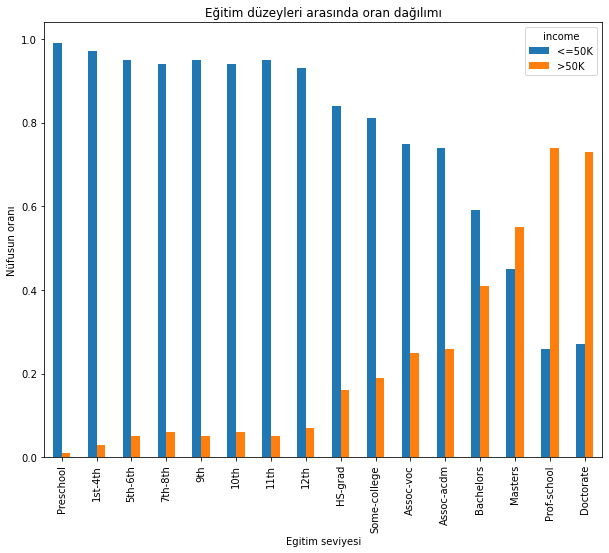

In [29]:
printmd('## 2.1. Egitim Seviyesi vs Gelir Duzeyi')

education = round(pd.crosstab(adult.education, adult.income).div(pd.crosstab(adult.education, adult.income).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

ax = education.plot(kind ='bar', title = 'Eğitim düzeyleri arasında oran dağılımı', figsize = (10,8))
ax.set_xlabel('Egitim seviyesi')
ax.set_ylabel('Nüfusun oranı')

printmd('Aşağıdaki şekilde gelir sınıflarının eğitim düzeylerindeki oranını gösteren bir çubuk grafik çiziyorum. Tahmin edebileceğiniz gibi, aşağıdaki çubuk grafikten, eğitim seviyesi arttıkça, yılda 50 binden fazla kazanan insanların oranının da arttığını görüyoruz. Sadece yüksek lisans derecesinden sonra, yılda 50 bin dolardan fazla kazanan insanların oranının çoğunluk olması ilginçtir.')

## 2.2 Cinsiyet vs Gelir Duzeyi

Aşağıdaki şekilde gelir sınıflarının cinsiyetler arasındaki oranını gösteren bir çubuk grafik çiziyoruz. Grafikten, genel bir bakış açısına göre, kadınlar ve erkekler arasında bir ücret farkı var. Gelirin tam değerine sahip olmadığımız için, yalnızca yılda 50 bin dolardan fazla kazanan erkeklerin oranının kadın meslektaşlarının iki katından fazla olduğunu gözlemlemekle sınırlıyız.

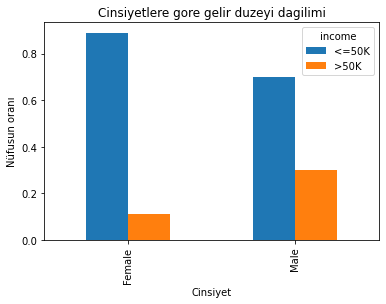

In [30]:
printmd('## 2.2 Cinsiyet vs Gelir Duzeyi')
gender = round(pd.crosstab(adult.gender, adult.income).div(pd.crosstab(adult.gender, adult.income).apply(sum,1),0),2)
gender.sort_values(by = '>50K', inplace = True)
ax = gender.plot(kind ='bar', title = 'Cinsiyetlere gore gelir duzeyi dagilimi')
ax.set_xlabel('Cinsiyet')
ax.set_ylabel('Nüfusun oranı')

printmd('Aşağıdaki şekilde gelir sınıflarının cinsiyetler arasındaki oranını gösteren bir çubuk grafik çiziyoruz. Grafikten, genel bir bakış açısına göre, kadınlar ve erkekler arasında bir ücret farkı var. Gelirin tam değerine sahip olmadığımız için, yalnızca yılda 50 bin dolardan fazla kazanan erkeklerin oranının kadın meslektaşlarının iki katından fazla olduğunu gözlemlemekle sınırlıyız.')

Kadınlar ve erkekler arasındaki gelir eşitsizliğine daha yakından bakmak için, aşağıdaki şekilde görüldüğü gibi yıllık gelir oranı 50K nın üstünde olan tüm çalışma alanlarının dağılımını görebileceğimiz bir çubuk grafik çiziyoruz. Grafikten de anlayabildiğimiz gibi her çalışma alanında yıllık 50 binden fazla kazanan erkeklerin oranı kadınların oranından fazla

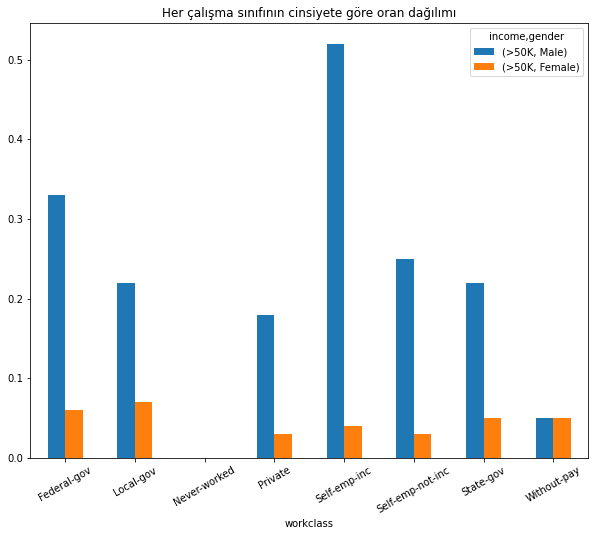

In [31]:
gender_workclass = round(pd.crosstab(adult.workclass, [adult.income, adult.gender]).div(pd.crosstab(adult.workclass, [adult.income, adult.gender]).apply(sum,1),0),2)
gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'Her çalışma sınıfının cinsiyete göre oran dağılımı', figsize = (10,8), rot = 30)
ax.set_xlabel('Cinsiyet')
ax.set_ylabel('Nüfusun dağılımı')

printmd('Kadınlar ve erkekler arasındaki gelir eşitsizliğine daha yakından bakmak için, aşağıdaki şekilde görüldüğü gibi yıllık gelir oranı 50K nın üstünde olan tüm çalışma alanlarının dağılımını görebileceğimiz bir çubuk grafik çiziyoruz. Grafikten de anlayabildiğimiz gibi her çalışma alanında yıllık 50 binden fazla kazanan erkeklerin oranı kadınların oranından fazla')

## 2.4. Calisma Sinifi vs Gelir Duzeyi

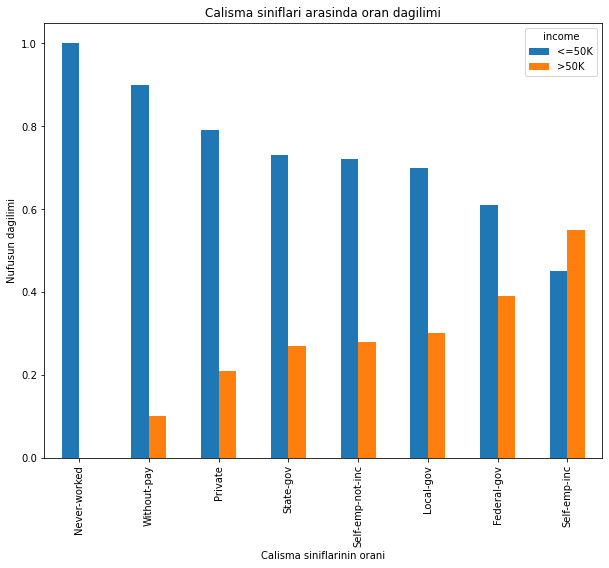

In [32]:
printmd('## 2.4. Calisma Sinifi vs Gelir Duzeyi')

workclass = round(pd.crosstab(adult.workclass, adult.income).div(pd.crosstab(adult.workclass, adult.income).apply(sum,1),0),2)
workclass.sort_values(by = '>50K', inplace = True)
ax=workclass.plot(kind = 'bar', title= 'Calisma siniflari arasinda oran dagilimi', figsize = (10,8))
ax.set_xlabel('Calisma siniflarinin orani')
ax.set_ylabel('Nufusun dagilimi')

print()

## 2.5. Irk vs Gelir Duzeyi

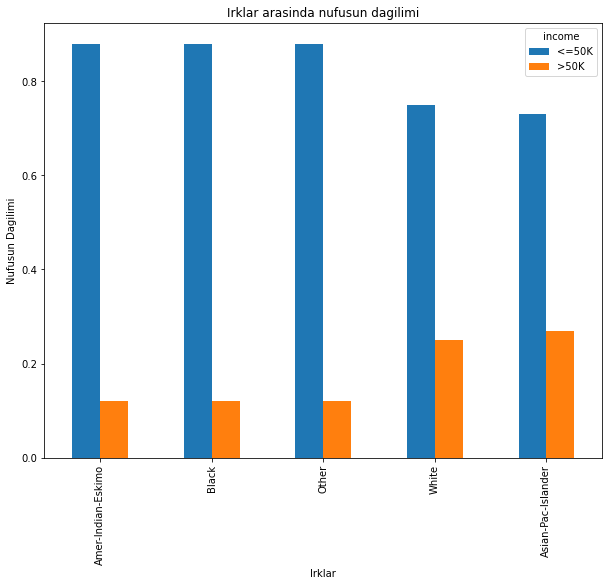

In [51]:
printmd('## 2.5. Irk vs Gelir Duzeyi')

race = round(pd.crosstab(adult.race, adult.income).div(pd.crosstab(adult.race, adult.income).apply(sum,1),0),2)
race.sort_values(by = '>50K', inplace = True)
ax = race.plot(kind ='bar', title = 'Irklar arasinda nufusun dagilimi', figsize = (10,8))
ax.set_xlabel('Irklar')
ax.set_ylabel('Nufusun Dagilimi')

print()

## 2.6. Ana Vatan vs Gelir Duzeyi

Aşağıdaki şekilde, ülke genelinde gelir sınıflarının oranını gösteren bir çubuk grafik çizilmiştir. Grafikten, ana vatanların konumlandırılmasında bir eğilim olduğunu fark ediyoruz. Güney Amerika ülkeleri, yılda 50 bin dolardan fazla olan nüfusun düşük oranıyla grafiğin sol ucunda. Amerika Birleşik Devletleri biraz daha merkezi bir konumdadır ve sağda Avrupa ve Asya'dan gelen ve yılda 50 bin dolardan fazla nüfusu olan ülkeler bulunmaktadır.

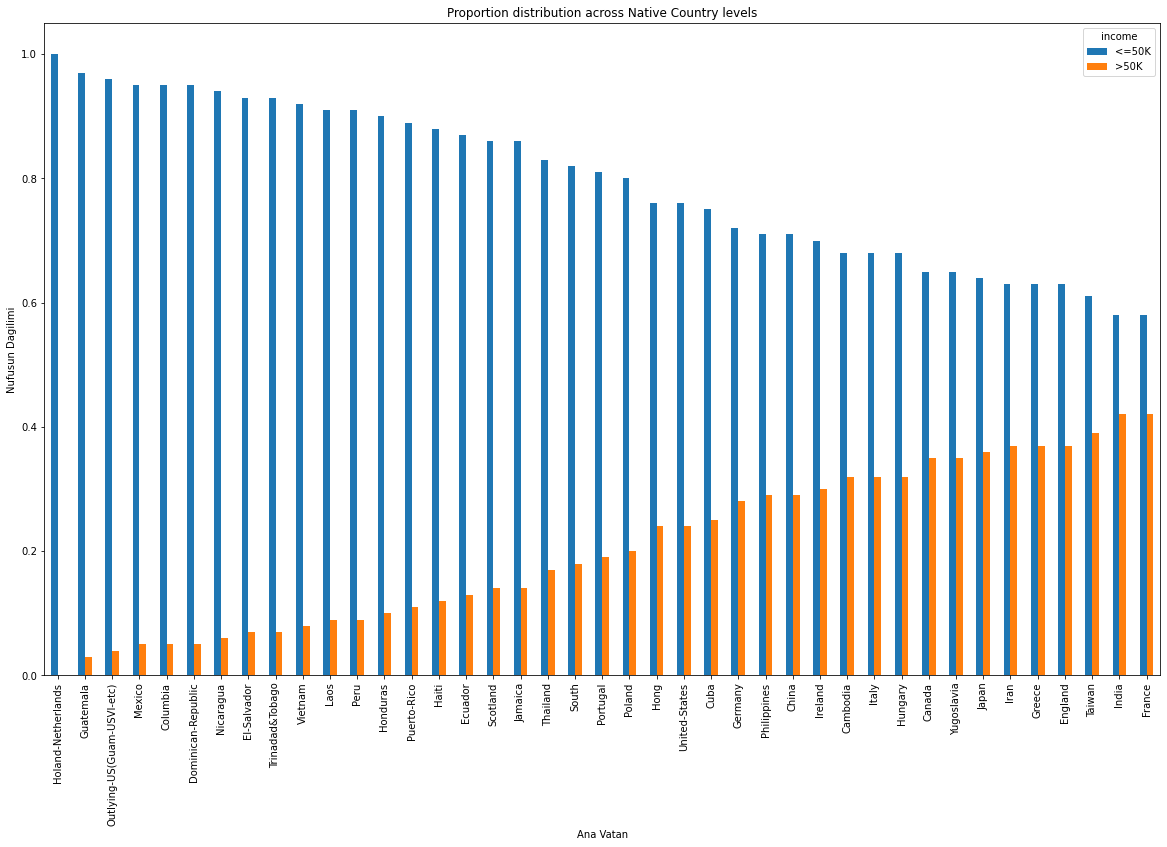

In [34]:
printmd('## 2.6. Ana Vatan vs Gelir Duzeyi')

native_country = round(pd.crosstab(adult['native-country'], adult.income).div(pd.crosstab(adult['native-country'], adult.income).apply(sum,1),0),2)
native_country.sort_values(by = '>50K', inplace = True)
ax = native_country.plot(kind ='bar', title = 'Proportion distribution across Native Country levels', figsize = (20,12))
ax.set_xlabel('Ana Vatan')
ax.set_ylabel('Nufusun Dagilimi')

printmd('Aşağıdaki şekilde, ülke genelinde gelir sınıflarının oranını gösteren bir çubuk grafik çizilmiştir. Grafikten, ana vatanların konumlandırılmasında bir eğilim olduğunu fark ediyoruz. Güney Amerika ülkeleri, yılda 50 bin dolardan fazla olan nüfusun düşük oranıyla grafiğin sol ucunda. Amerika Birleşik Devletleri biraz daha merkezi bir konumdadır ve sağda Avrupa ve Asya\'dan gelen ve yılda 50 bin dolardan fazla nüfusu olan ülkeler bulunmaktadır.')

## 2.7. Haftalık Calısma Saatlerı vs Gelır Duzeyı

Aşağıdaki grafikte çalışılan haftalık saatlere kıyasla gelir oranlarının gösterildiği bir grafik çizilmiştir. Grafikten haftalık çalışılan süre arttıkça gelir düzeyinin de arttığının okunmasını bekleriz.Ancak, bu beklentimiz ile grafikteki birden çok sonuç ile uyuşmuyor. Örneğin haftalık saat değerlerinin 77, 79, 81, 82, 87, 88... gibi değerlerinde yıllık +50 bin dolardan fazla kazanan kimse olmamış.

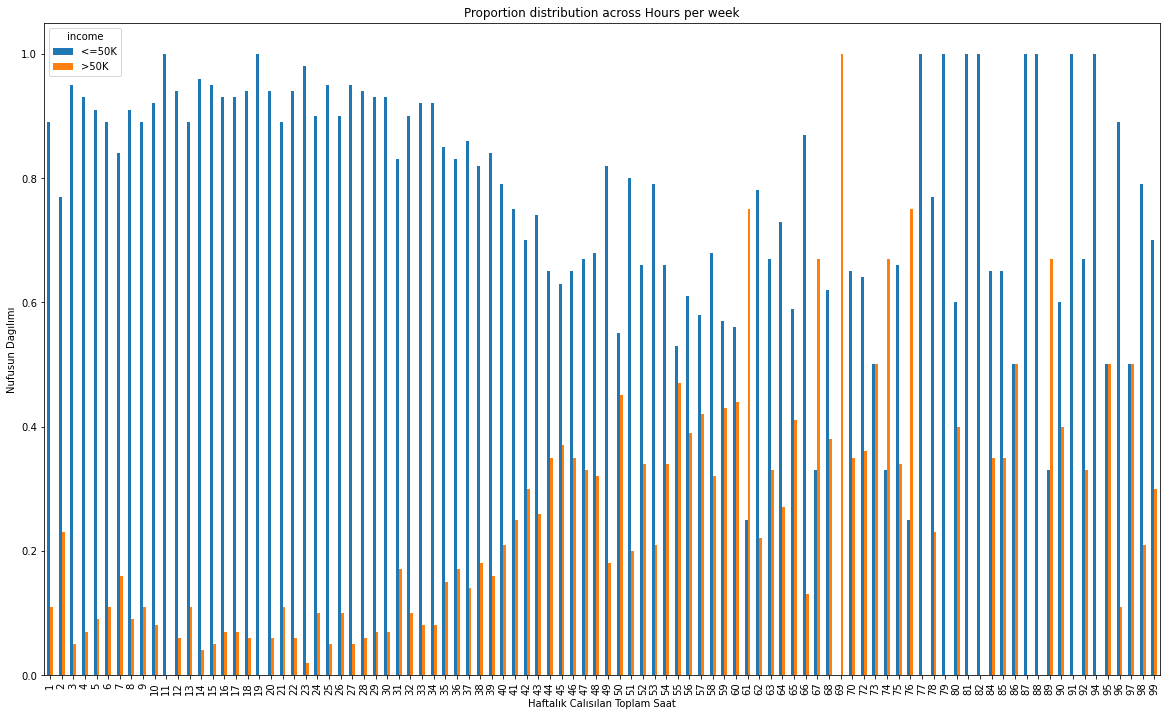

In [35]:
printmd('## 2.7. Haftalık Calısma Saatlerı vs Gelır Duzeyı')

hours_per_week = round(pd.crosstab(adult['hours-per-week'], adult.income).div(pd.crosstab(adult['hours-per-week'], adult.income).apply(sum,1),0),2)
# hours_per_week.sort_values(by = '>50K', inplace = True)
ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (20,12))
ax.set_xlabel('Haftalık Calısılan Toplam Saat')
ax.set_ylabel('Nufusun Dagılımı')

printmd('Aşağıdaki grafikte çalışılan haftalık saatlere kıyasla gelir oranlarının gösterildiği bir grafik çizilmiştir. Grafikten haftalık çalışılan süre arttıkça gelir düzeyinin de arttığının okunmasını bekleriz.Ancak, bu beklentimiz ile grafikteki birden çok sonuç ile uyuşmuyor. Örneğin haftalık saat değerlerinin 77, 79, 81, 82, 87, 88... gibi değerlerinde yıllık +50 bin dolardan fazla kazanan kimse olmamış.')

### 2.7.2 Hours worked across working classes

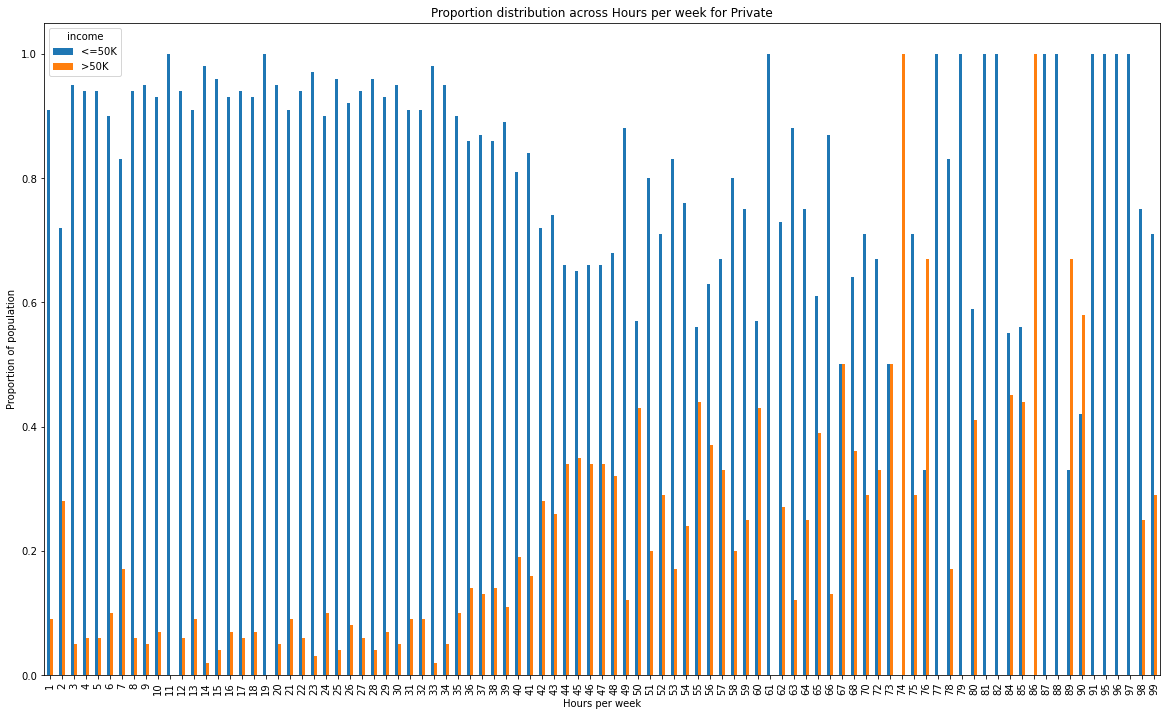

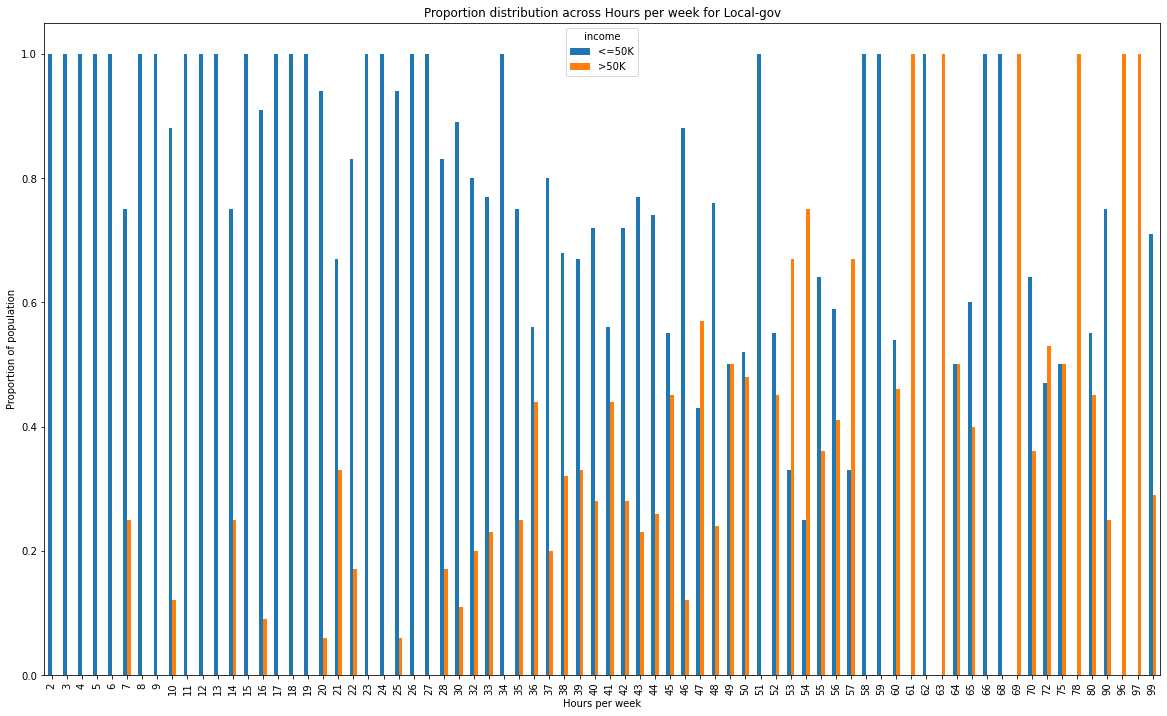

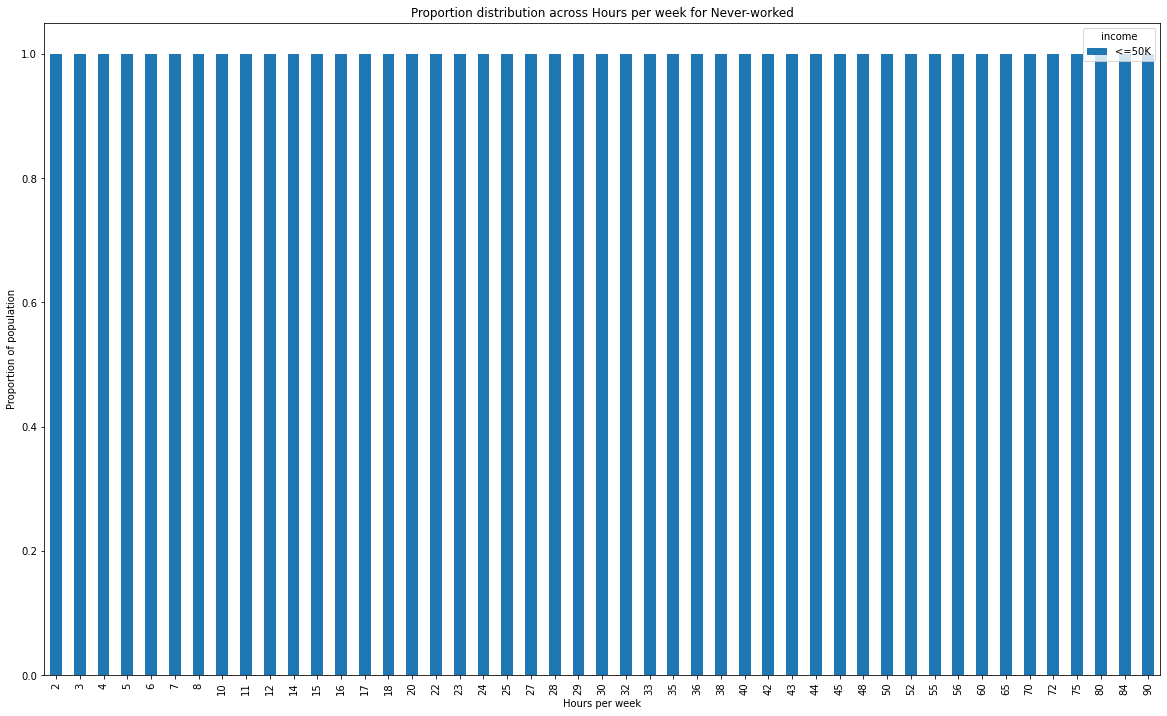

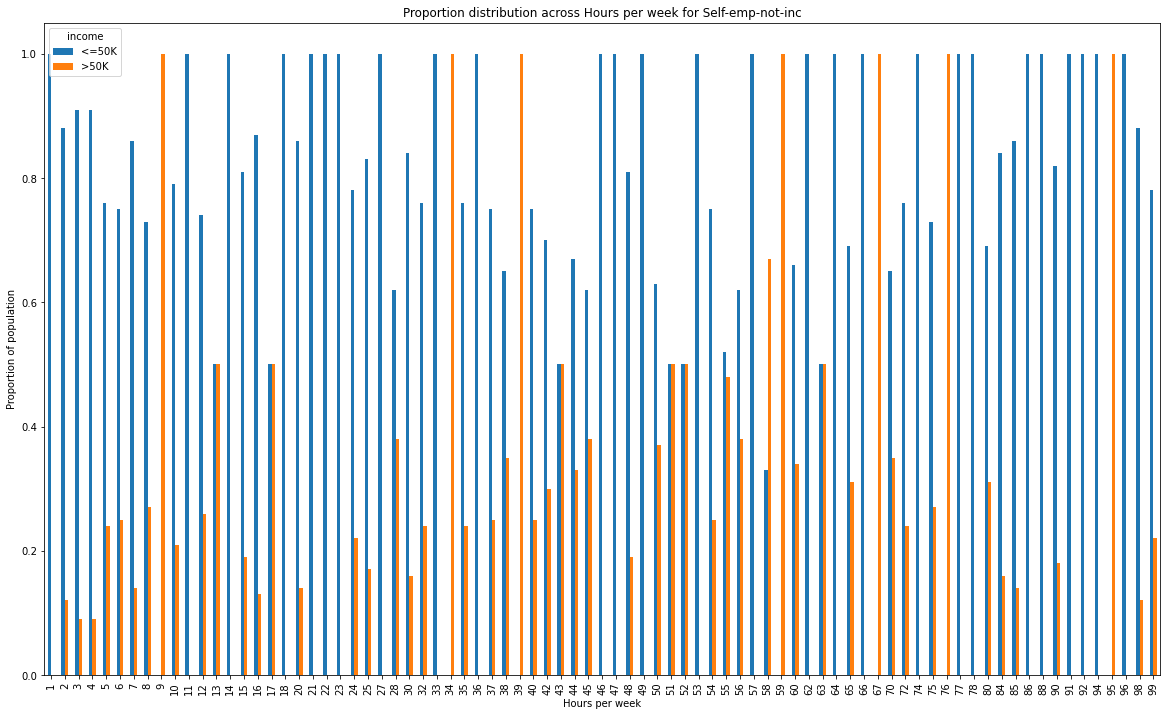

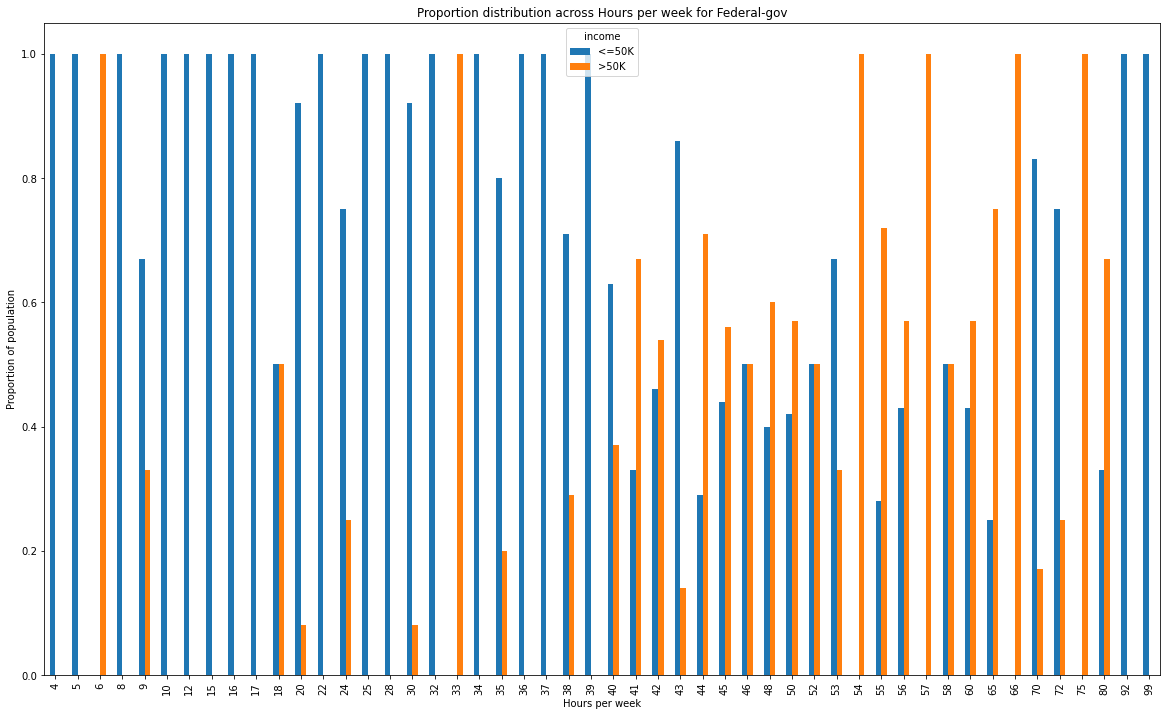

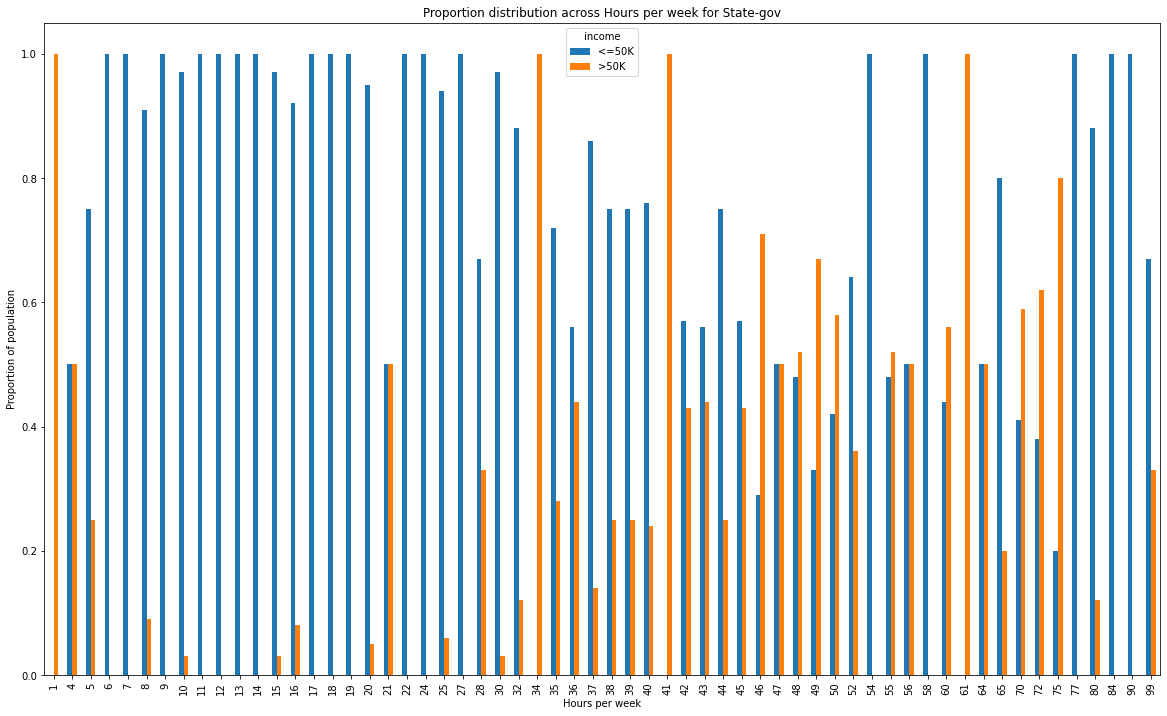

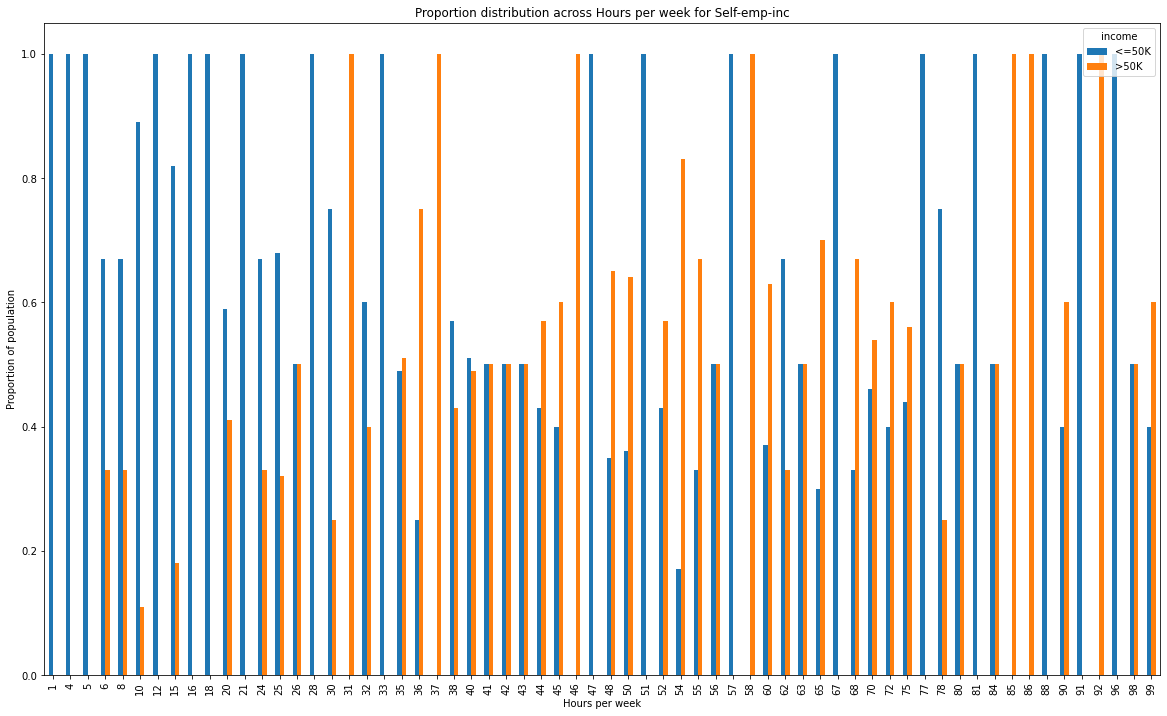

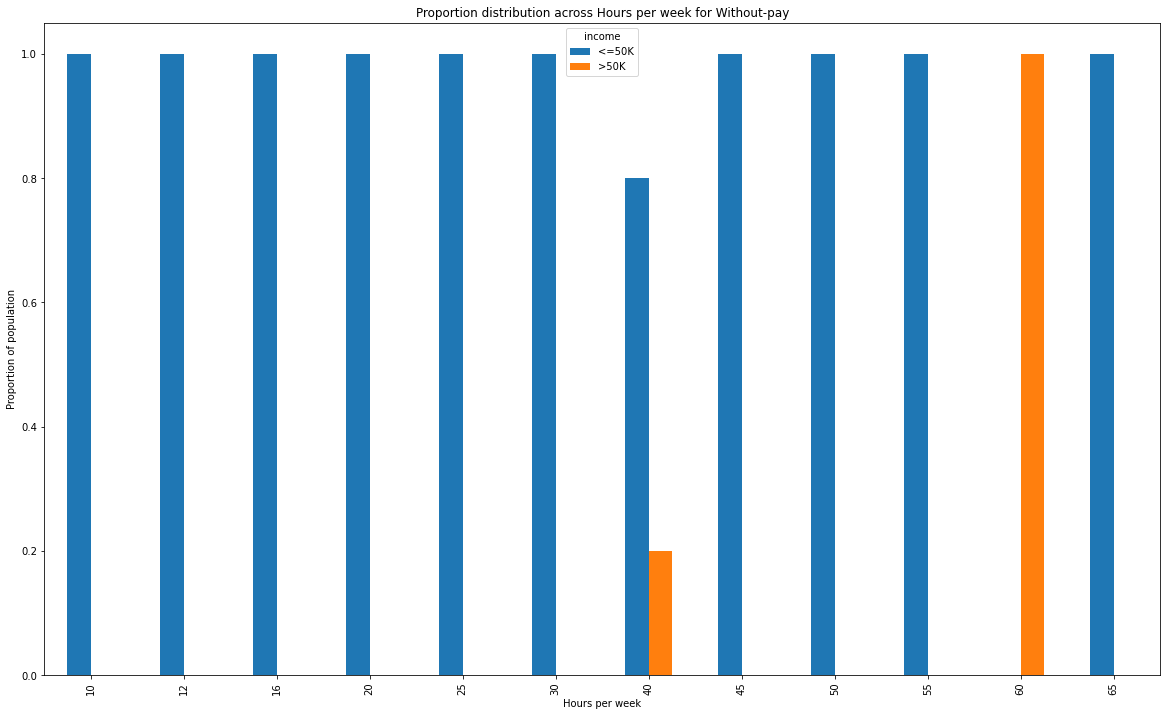

In [36]:
printmd('### 2.7.2 Hours worked across working classes')

for i in adult.workclass.unique():
    df = adult[adult.workclass == i]

    hours_per_week = round(pd.crosstab(df['hours-per-week'], df.income).div(pd.crosstab(df['hours-per-week'], df.income).apply(sum,1),0),2)
    # hours_per_week.sort_values(by = '>50K', inplace = True)
    ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week for '+ i, figsize = (20,12))
    ax.set_xlabel('Hours per week')
    ax.set_ylabel('Proportion of population')

    print()

# 3. Veri Dönüşümleri

## 3.1. Ozellik Secimi

Eğitim düzeyi için aynı anlamı taşıyan 2 özelliğimiz var, "education" ve "educational-num". Bu öznitelik bilgisini saptırmamak için kategorik "education" özniteliğini kullanmayacağım.

In [52]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [53]:
#'hour-per-week' sutunun ve 'fnlwgt' sutunun kaldirilmasi
adult.drop(columns = ['education','fnlwgt','hours-per-week'], inplace = True)

In [54]:
adult.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,United-States,>50K
4,18,?,10,Never-married,?,Own-child,White,Female,0,0,United-States,<=50K


## 3.2 Normalizasyon

## Kutu Grafigi

<AxesSubplot:>

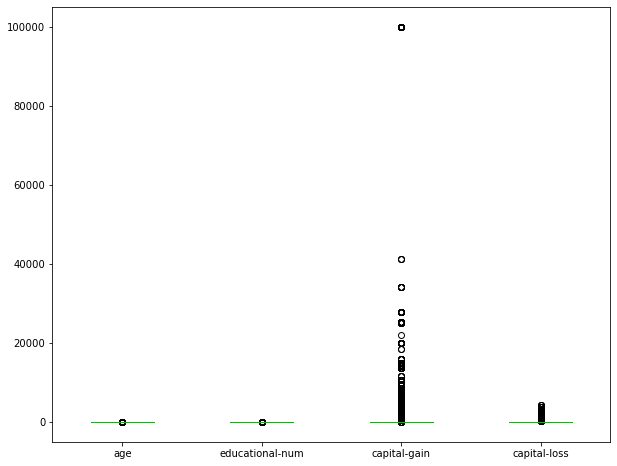

In [40]:
printmd('## Kutu Grafigi')
adult.select_dtypes(exclude = 'category').plot(kind = 'box', figsize = (10,8))

Normalleştirme, ortalamayı kaldırarak ve birim varyansa ölçeklendirerek eğitim veri kümesinde gerçekleşir. Bu değerler saklanır ve daha sonra test verileri tahmin için modele geçirilmeden önce test verilerine uygulanır.

# 4. Model Geliştirme ve Sınıflandırma

## 4.1. Veri Hazırlama

One-hot encoding, çok sınıflı kategorik özellikleri, her sınıf için bir tane olmak üzere ikili özellikler (0-1) olarak temsil etme işlemidir. Bu işlem veri kümesinin boyutsallığını artırsa da, sınıflandırma algoritmaları bu veri biçimi üzerinde daha iyi çalışma eğilimindedir.

Veri kümesindeki tüm kategorik özellikleri temsil etmek için one-hot encoding kullanalım.

In [55]:
# Veri Hazirligi
adult_data = adult.drop(columns = ['income'])
adult_label = adult.income


adult_cat_1hot = pd.get_dummies(adult_data.select_dtypes('category'))
adult_non_cat = adult_data.select_dtypes(exclude = 'category')

adult_data_1hot = pd.concat([adult_non_cat, adult_cat_1hot], axis=1, join='inner')

In [56]:
# Train - Test ayrimi
train_data, test_data, train_label, test_label = train_test_split(adult_data_1hot, adult_label, test_size  = 0.25)


In [57]:
# Normalizasyon
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

# Sadece eğitim verilerine uydurma
scaler.fit(train_data)  
train_data = scaler.transform(train_data)  

# Test verilerine aynı dönüşümü uygulama
test_data = scaler.transform(test_data) 

In [58]:
def model_eval(actual, pred):
    
    confusion = pd.crosstab(actual, pred, rownames=['Actual'], colnames=['Predicted'])
    TP = confusion.loc['>50K','>50K']
    TN = confusion.loc['<=50K','<=50K']
    FP = confusion.loc['<=50K','>50K']
    FN = confusion.loc['>50K','<=50K']

    accuracy = ((TP+TN))/(TP+FN+FP+TN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    f_measure = (2*recall*precision)/(recall+precision)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    error_rate = 1 - accuracy
    
    out = {}
    out['accuracy'] =  accuracy
    out['precision'] = precision
    out['recall'] = recall
    out['f_measure'] = f_measure
    out['sensitivity'] = sensitivity
    out['specificity'] = specificity
    out['error_rate'] = error_rate
    
    return out

## 4.2. Model Gelistirme

### 4.2.1. Artificial Neural Network

* **Activation:** Logistic (Marginally outperformed 'relu', 'tanh' and 'identity' functions.)
* **Solver:** Adam (Works well on relatively large datasets with thousands of training samples or more)
* **Alpha:** 1e-4 (Best amongst 1, 1e-1, 1e-2, 1e-3, 1e-4 and 1e-5)
* **Learning Rate:** 'invscaling' (Gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'.)

In [59]:
# Tan H
ann_tanh = MLPClassifier(activation = 'tanh', solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(10, 2), random_state=1, warm_start=True)
ann_tanh.fit(train_data, train_label)                         
ann_tanh_pred = ann_tanh.predict(test_data)
ANN_TanH = model_eval(test_label, ann_tanh_pred)
print('ANN using TanH and lbfgs solver : %.2f percent.' % (round(ANN_TanH['accuracy']*100,2)))


# Relu
ann_relu = MLPClassifier(activation = 'relu', solver='adam', alpha=1e-1, 
                    hidden_layer_sizes=(5, 2), random_state=1,
                    learning_rate  = 'invscaling',
                    warm_start = True)
ann_relu.fit(train_data, train_label)                         
ann_relu_pred = ann_relu.predict(test_data)
ANN_relu = model_eval(test_label, ann_relu_pred)
print('ANN using relu and adam solver : %.2f percent.' % (round(ANN_relu['accuracy']*100,2)))

# Log
ann_log = MLPClassifier(activation = 'logistic', solver='adam', 
                    alpha=1e-4, hidden_layer_sizes=(5, 2),
                    learning_rate  = 'invscaling', 
                    random_state=1, warm_start = True)
ann_log.fit(train_data, train_label)                         
ann_log_pred = ann_log.predict(test_data)
ANN_log = model_eval(test_label, ann_log_pred)
print('ANN using logistic and adam solver : %.2f percent.' % (round(ANN_log['accuracy']*100,2)))

# Identity
ann_identity = MLPClassifier(activation = 'identity', solver='adam', alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=1, warm_start = True)
ann_identity.fit(train_data, train_label)                         
ann_identity_pred = ann_identity.predict(test_data)
ANN_identity = model_eval(test_label, ann_identity_pred)
print('ANN using identity and adam solver : %.2f percent.' % (round(ANN_identity['accuracy']*100,2)))

#printmd('### 3.2.2. Model Evaulation ')
ovl_ann = round(pd.DataFrame([ANN_TanH, ANN_relu, ANN_log, ANN_identity], index = ['ANN_TanH','ANN_relu', 'ANN_log', 'ANN_identity']),4)
display(ovl_ann)

C:\Users\Ecem\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


ANN using TanH and lbfgs solver : 85.50 percent.
ANN using relu and adam solver : 85.58 percent.
ANN using logistic and adam solver : 85.61 percent.
ANN using identity and adam solver : 85.28 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
ANN_TanH,0.8550,0.7273,0.6139,0.6658,0.6139,0.9292,0.1450
ANN_relu,0.8558,0.7230,0.6271,0.6716,0.6271,0.9261,0.1442
ANN_log,0.8561,0.7210,0.6334,0.6743,0.6334,0.9246,0.1439
ANN_identity,0.8528,0.7251,0.6024,0.6580,0.6024,0.9298,0.1472


# 5. ROC Egrisi


In [46]:
def generateRoc(test_data, test_label, classifiers, pred_labels, plot_labels, limiter):
    
    color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    
    y_test = label_binarize(test_label, classes=['<=50K', '>50K'])
    plt.figure()
    
    for i in range(len(classifiers)):
        
        if plot_labels[i] not in limiter:
            continue
        
        y_score = classifiers[i].predict_proba(test_data)
        pos_class_index = list(np.unique(pred_labels[i])).index('>50K')
        
        fpr, tpr, thres = metrics.roc_curve(y_test.ravel(),y_score[:,pos_class_index], pos_label=1)
                               
        lw = 2
        plt.plot(fpr, tpr, color=color[i % len(color)],lw=lw, label=plot_labels[i])
        
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

<IPython.core.display.Javascript object>


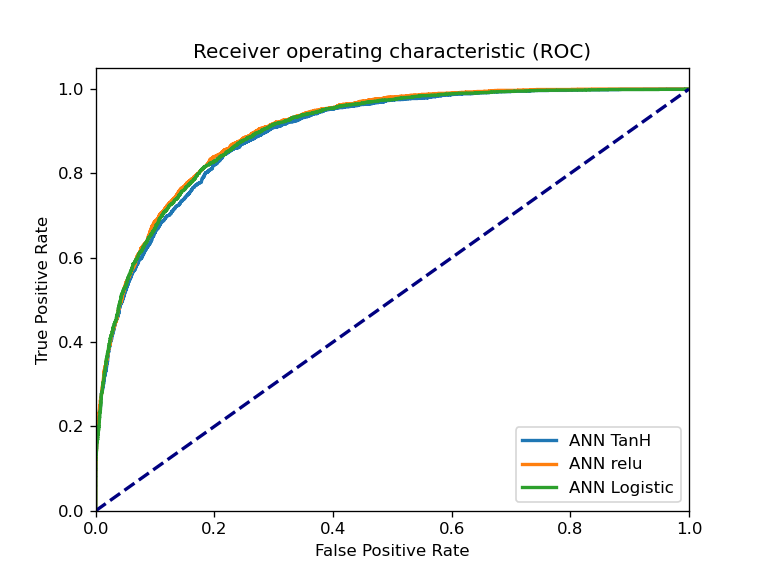

In [179]:
%matplotlib notebook
classifier_list = [ann_tanh
                ,ann_relu
                ,ann_log
                ,ann_identity
                ] 
pred_list = [ann_tanh_pred
            ,ann_relu_pred
            ,ann_log_pred
            ,ann_identity_pred
            ]

clf_labels = ['ANN TanH'
            ,'ANN relu'
            ,'ANN Logistic'
            ,'ANN Identity'
            ]

limiter = ['ANN TanH', 'ANN relu', 'ANN Logistic']
generateRoc(test_data, test_label, classifier_list, pred_list, clf_labels, limiter)